In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

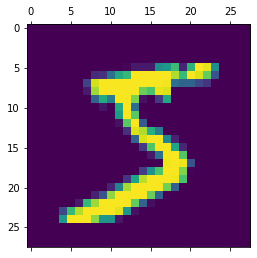

In [13]:
plt.matshow(X_train[0])

In [14]:
y_train[0]

5

In [16]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape


(60000, 784)

In [19]:
X_train_flattened[0]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1879 - accuracy: 0.5815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9770 - accuracy: 0.7038
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7905 - accuracy: 0.7387
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6268 - accuracy: 0.7613
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4839 - accuracy: 0.7765


In [21]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 1.4044 - accuracy: 0.7986


[1.4043840169906616, 0.7986000180244446]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([0.3164799 , 0.39749867, 0.35149026, 0.4173981 , 0.478662  ,
       0.37426102, 0.2895853 , 0.812675  , 0.37570375, 0.5781705 ],
      dtype=float32)

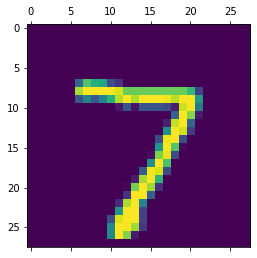

In [24]:
plt.matshow(X_test[0])


In [25]:
np.argmax(y_predicted[0])

7

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 925,    2,    6,   11,    0,    1,   29,    1,    5,    0],
       [   0, 1108,    8,    4,    0,    0,    4,    0,   11,    0],
       [  19,   83,  776,   40,   20,    0,   33,   22,   38,    1],
       [   6,   45,   27,  867,    1,    2,    5,   27,   23,    7],
       [   2,   46,    2,    0,  805,    0,   29,   13,    4,   81],
       [  40,  112,    3,  218,   36,  352,   28,   49,   30,   24],
       [  26,   48,    6,    0,   14,    6,  857,    0,    1,    0],
       [   2,   67,   12,    2,   10,    0,    2,  911,    7,   15],
       [  22,   91,    8,  102,   17,    2,   17,   29,  667,   19],
       [  23,   43,    5,   11,   81,    0,    1,  119,    8,  718]])>

Text(69.0, 0.5, 'Truth')

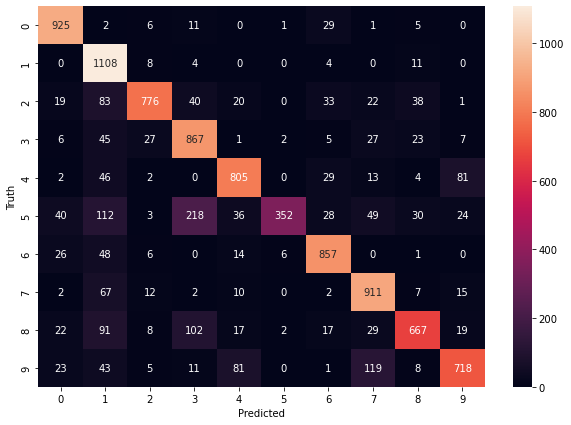

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1849 - accuracy: 0.7254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8734
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3844 - accuracy: 0.8951
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3199 - accuracy: 0.9088


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.9150


[0.3006247878074646, 0.9150000214576721]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

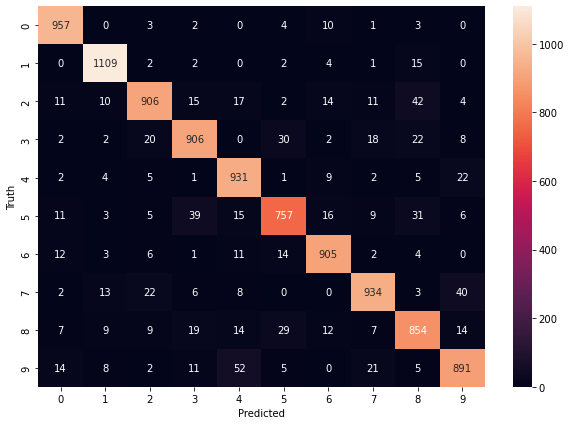

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2555 - accuracy: 0.7031
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5269 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4047 - accuracy: 0.8901
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.9000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3304 - accuracy: 0.9068
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.9107
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2991 - accuracy: 0.9141
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2880 - accuracy: 0.9175
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.9205
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.269

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2597 - accuracy: 0.9250


[0.25969672203063965, 0.925000011920929]